<a href="https://colab.research.google.com/github/RicardoGonCabrera/Loan-Approval-ML/blob/main/notebooks/01_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

{}

In [2]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d parthpatel2130/realistic-loan-approval-dataset-us-and-canada
!unzip realistic-loan-approval-dataset-us-and-canada

Dataset URL: https://www.kaggle.com/datasets/parthpatel2130/realistic-loan-approval-dataset-us-and-canada
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
realistic-loan-approval-dataset-us-and-canada.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  realistic-loan-approval-dataset-us-and-canada.zip
replace Loan_approval_data_2025.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [3]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 3.1 MB/s eta 0:00:00


In [14]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import category_encoders as ce


df = pd.read_csv('Loan_approval_data_2025.csv')

df = df.dropna(subset=['loan_status'])
X = df.drop(columns=['loan_status'])
X = X.drop(columns=['customer_id'])
Y = df['loan_status']



num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns

encoder = ce.TargetEncoder(cols=cat_cols)
X_encoded = encoder.fit_transform(X, Y)





Mutual Information de features:


<Figure size 1200x600 with 0 Axes>

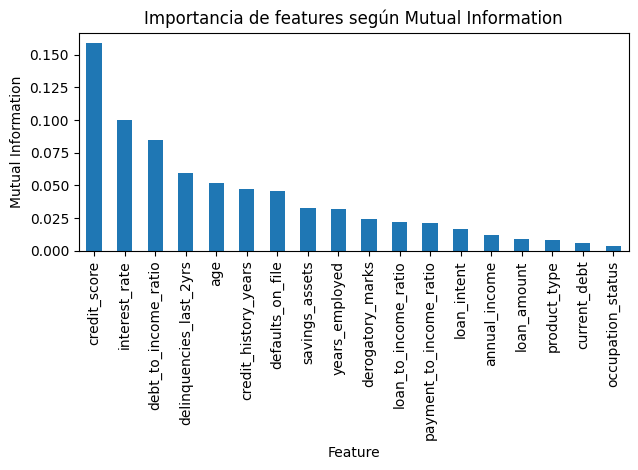

In [15]:
from numpy import sort
import matplotlib.pyplot as plt
mi_scores = mutual_info_classif(X_encoded, Y, random_state=42)

#Creo un dataset para representar la informacion con resultados

mi_df = pd.DataFrame({'Feature': X_encoded.columns, 'Mutual Information': mi_scores}).sort_values(by='Mutual Information', ascending=False)
print("\nMutual Information de features:")
plt.figure(figsize=(12,6))
mi_df.set_index('Feature').plot(kind='bar', legend=False)
plt.title('Importancia de features según Mutual Information')
plt.ylabel('Mutual Information')
plt.tight_layout()
plt.show()